In [2]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
# sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
sys.path.insert(0, '/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [5]:
# pathMAC="/Users/jfmv/Documents/Proyectos/Moire-Phonon_QMC/BM_bandstructure"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite/Modular/'
pathMAC='/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/data/ME_scans/'
pathy=pathMAC

# Single Figs

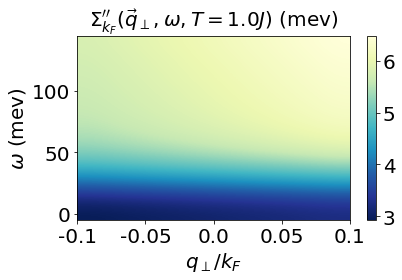

In [10]:

path=pathy+'T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
tss=float(df['T'].unique()[0])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
T=1.0
df_one_temp=df.loc[(df['theta'] == -4*np.pi/6)&(df['T'] == T)]
# d=df_one_temp.pivot(index='freq', columns='Q', values='SE')

def draw_heatmap(df,*args, **kwargs):
   
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    # sns.heatmap(d, **kwargs)
    # im =pcolor(x,y,se[1],vmin=np.min(se[1]), vmax=np.max(se[1]))
    vmi=2.931474
    vma=6.484698
    # print(np.max(d), np.min(d))
    im=plt.imshow(d,vmin=vmi, vmax=vma, cmap='YlGnBu_r', interpolation = 'bicubic',aspect='auto',origin='lower')
    title(r"$\Sigma_{k_F} ''(\vec{q}_{\perp},\omega, T="+str(T)+"J)$ (mev)", size=20)
    ylabel(r"$\omega$ (mev)", size=20)
    xlabel(r"$q_{\perp}/k_F$ ", size=20)
    cbar = plt.colorbar(im)
    tick_font_size = 20
    cbar.ax.tick_params(labelsize=tick_font_size)
    xt=[-0.1,-0.05,0.0,0.05,0.1]
    yt=[0,50,100]
    xtpos=np.array([0,2.5,5, 7.5,10])-0.5
    ytpos=np.array([0,5 ,10])
    xticks(xtpos,xt,size=20)
    yticks(ytpos,yt,size=20)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=7)
    plt.tight_layout()
    savefig("imgs/pap_fig1c.png", dpi=400)
    show()

draw_heatmap(df_one_temp, 'Q', 'freq', 'SE')



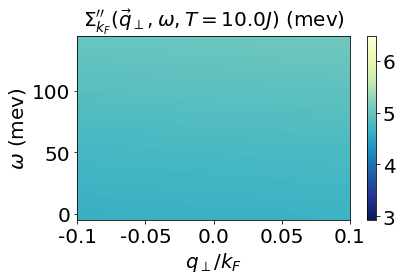

In [9]:

path=pathy+'T10data_ME_2022-05-01-15-49-15.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
tss=float(df['T'].unique()[0])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
T=10.0
df_one_temp=df.loc[(df['theta'] == -4*np.pi/6)&(df['T'] == T)]
# d=df_one_temp.pivot(index='freq', columns='Q', values='SE')

def draw_heatmap(df,*args, **kwargs):
   
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    # sns.heatmap(d, **kwargs)
    # im =pcolor(x,y,se[1],vmin=np.min(se[1]), vmax=np.max(se[1]))
    vmi=2.931474
    vma=6.484698
    im=plt.imshow(d,vmin=vmi, vmax=vma, cmap='YlGnBu_r', interpolation = 'bicubic',aspect='auto',origin='lower')
    title(r"$\Sigma_{k_F} ''(\vec{q}_{\perp},\omega, T="+str(T)+"J)$ (mev)", size=20)
    ylabel(r"$\omega$ (mev)", size=20)
    xlabel(r"$q_{\perp}/k_F$ ", size=20)
    cbar = plt.colorbar(im)
    tick_font_size = 20
    cbar.ax.tick_params(labelsize=tick_font_size)
    xt=[-0.1,-0.05,0.0,0.05,0.1]
    yt=[0,50,100]
    xtpos=np.array([0,2.5,5, 7.5,10])-0.5
    ytpos=np.array([0,5 ,10])
    xticks(xtpos,xt,size=20)
    yticks(ytpos,yt,size=20)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=7)
    plt.tight_layout()
    savefig("imgs/pap_fig1d.png", dpi=400)
    show()

draw_heatmap(df_one_temp, 'Q', 'freq', 'SE')


# Panels

[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]
0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


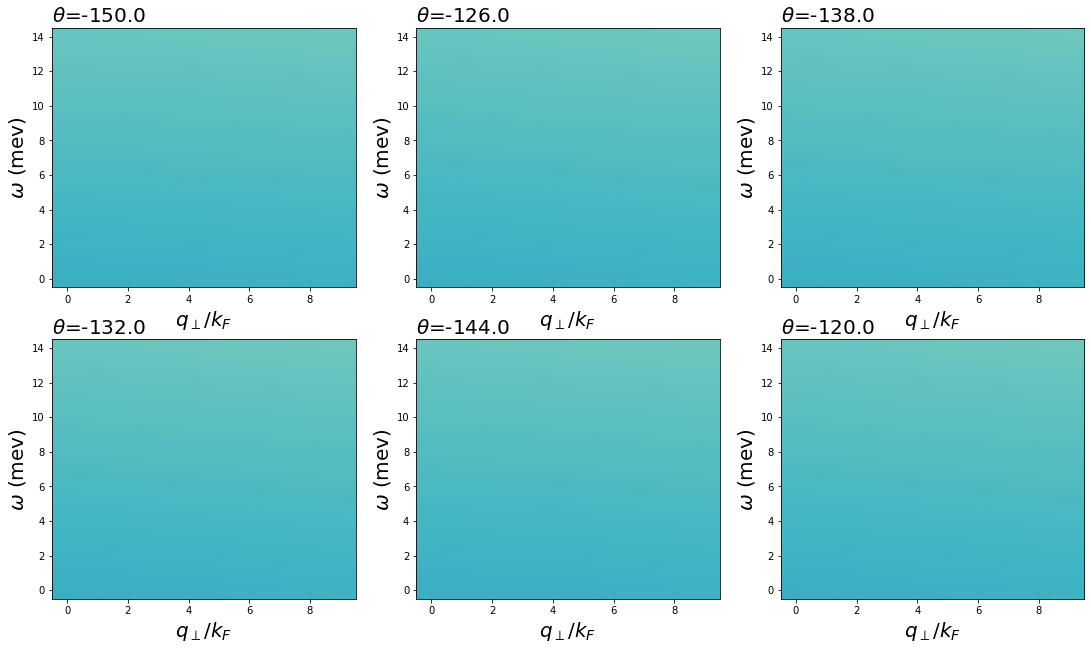

In [73]:

path=pathy+'T10data_ME_2022-05-01-15-49-15.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
tss=float(df['T'].unique()[0])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
T=10.0
df_one_temp=df.loc[(df['theta'] == -4*np.pi/6)&(df['T'] == T)]
# d=df_one_temp.pivot(index='freq', columns='Q', values='SE')

def draw_heatmap(df, *args,axi):
       
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    # sns.heatmap(d, **kwargs)
    # im =pcolor(x,y,se[1],vmin=np.min(se[1]), vmax=np.max(se[1]))
    vmi=2.931474
    vma=6.484698
    # print(np.max(d), np.min(d))
    im=axi.imshow(d,vmin=vmi, vmax=vma, cmap='YlGnBu_r', interpolation = 'bicubic',aspect='auto',origin='lower')
    # axi.set_title(r"$\Sigma ''(\vec{q}_{\perp}+\vec{k_F},\omega, T="+str(T)+"J)$ (mev)", size=20)
    axi.set_ylabel(r"$\omega$ (mev)", size=20)
    axi.set_xlabel(r"$q_{\perp}/k_F$ ", size=20)
    
    # xt=[-0.1,-0.05,0.0,0.05,0.1]
    # xtpos=np.array([0,2.5,5, 7.5,10])-0.5
    # axi.set_xticks(xtpos,xt,size=20)
    # axi.set_yticks(size=20)
    # pyplot.locator_params(axis='y', nbins=4)
    # pyplot.locator_params(axis='x', nbins=7)
    # plt.tight_layout()
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    
        
    draw_heatmap(df2, 'Q', 'freq', 'SE', axi= axis[i,j])
        
    # axis[i,j].scatter(x[1:],(y[1:]) ,   label=r'$T$='+str(T),s=15)
    # axis[i,j].set_xlim([0,150])
    
        
    axis[i,j].set_title(r'$\theta$='+str(round(th*180/np.pi,1)),loc='left', size=20)
    # axis[i,j].set_ylabel(r"Im($\tilde{\Sigma}(k,\omega, T)-\tilde{\Sigma}(k,0, T)$) (mev)")
    # axis[i,j].set_xlabel(r"$\omega$ (mev)")
    # # axis[i,j].legend()
plt.show()

[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]
0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


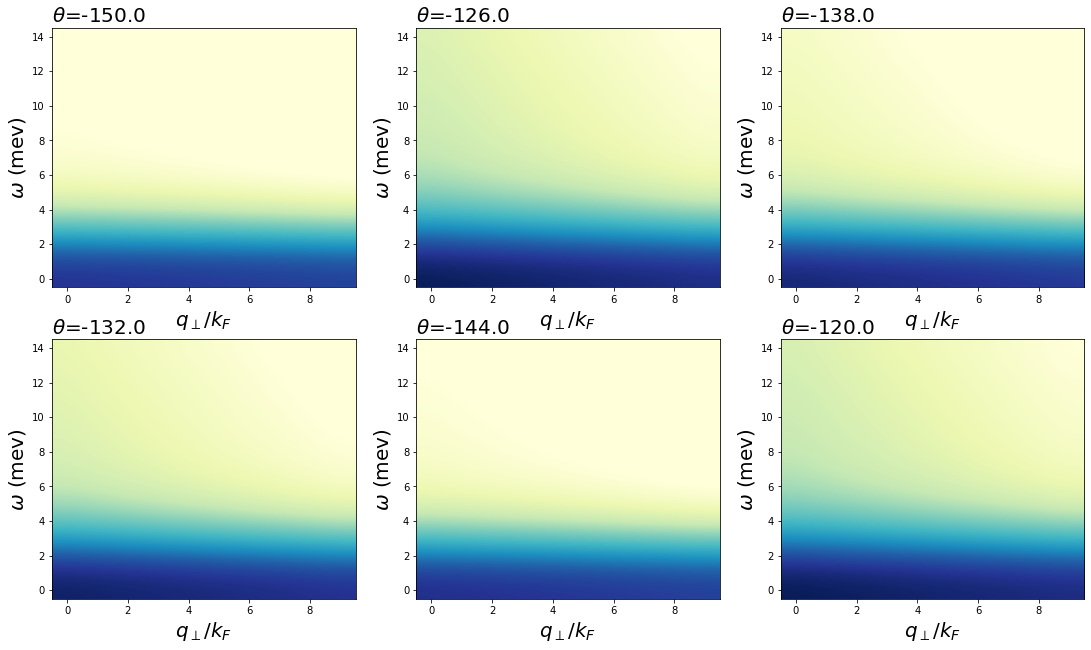

In [77]:


path=pathy+'T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
tss=float(df['T'].unique()[0])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
T=1.0
df_one_temp=df.loc[(df['theta'] == -4*np.pi/6)&(df['T'] == T)]
# d=df_one_temp.pivot(index='freq', columns='Q', values='SE')

def draw_heatmap(df, *args,axi):
       
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    # sns.heatmap(d, **kwargs)
    # im =pcolor(x,y,se[1],vmin=np.min(se[1]), vmax=np.max(se[1]))
    vmi=2.931474
    vma=6.484698
    # print(np.max(d), np.min(d))
    im=axi.imshow(d,vmin=vmi, vmax=vma, cmap='YlGnBu_r', interpolation = 'bicubic',aspect='auto',origin='lower')
    # axi.set_title(r"$\Sigma ''(\vec{q}_{\perp}+\vec{k_F},\omega, T="+str(T)+"J)$ (mev)", size=20)
    axi.set_ylabel(r"$\omega$ (mev)", size=20)
    axi.set_xlabel(r"$q_{\perp}/k_F$ ", size=20)
    
    # xt=[-0.1,-0.05,0.0,0.05,0.1]
    # xtpos=np.array([0,2.5,5, 7.5,10])-0.5
    # axi.set_xticks(xtpos,xt,size=20)
    # axi.set_yticks(size=20)
    # pyplot.locator_params(axis='y', nbins=4)
    # pyplot.locator_params(axis='x', nbins=7)
    # plt.tight_layout()
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    
        
    draw_heatmap(df2, 'Q', 'freq', 'SE', axi= axis[i,j])
        
    # axis[i,j].scatter(x[1:],(y[1:]) ,   label=r'$T$='+str(T),s=15)
    # axis[i,j].set_xlim([0,150])
    
        
    axis[i,j].set_title(r'$\theta$='+str(round(th*180/np.pi,1)),loc='left', size=20)
    # axis[i,j].set_ylabel(r"Im($\tilde{\Sigma}(k,\omega, T)-\tilde{\Sigma}(k,0, T)$) (mev)")
    # axis[i,j].set_xlabel(r"$\omega$ (mev)")
    # # axis[i,j].legend()
plt.show()

# Extracting fits at low $\omega$, $q$, $T$

In [ ]:


path=pathy+'T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
tss=float(df['T'].unique()[0])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
T=1.0
df_one_temp=df.loc[(df['theta'] == -4*np.pi/6)&(df['T'] == T)]
# d=df_one_temp.pivot(index='freq', columns='Q', values='SE')

def draw_heatmap(df, *args,axi):
       
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    # sns.heatmap(d, **kwargs)
    # im =pcolor(x,y,se[1],vmin=np.min(se[1]), vmax=np.max(se[1]))
    vmi=2.931474
    vma=6.484698
    # print(np.max(d), np.min(d))
    im=axi.imshow(d,vmin=vmi, vmax=vma, cmap='YlGnBu_r', interpolation = 'bicubic',aspect='auto',origin='lower')
    # axi.set_title(r"$\Sigma ''(\vec{q}_{\perp}+\vec{k_F},\omega, T="+str(T)+"J)$ (mev)", size=20)
    axi.set_ylabel(r"$\omega$ (mev)", size=20)
    axi.set_xlabel(r"$q_{\perp}/k_F$ ", size=20)
    
    # xt=[-0.1,-0.05,0.0,0.05,0.1]
    # xtpos=np.array([0,2.5,5, 7.5,10])-0.5
    # axi.set_xticks(xtpos,xt,size=20)
    # axi.set_yticks(size=20)
    # pyplot.locator_params(axis='y', nbins=4)
    # pyplot.locator_params(axis='x', nbins=7)
    # plt.tight_layout()
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    
        
    draw_heatmap(df2, 'Q', 'freq', 'SE', axi= axis[i,j])
        
    # axis[i,j].scatter(x[1:],(y[1:]) ,   label=r'$T$='+str(T),s=15)
    # axis[i,j].set_xlim([0,150])
    
        
    axis[i,j].set_title(r'$\theta$='+str(round(th*180/np.pi,1)),loc='left', size=20)
    # axis[i,j].set_ylabel(r"Im($\tilde{\Sigma}(k,\omega, T)-\tilde{\Sigma}(k,0, T)$) (mev)")
    # axis[i,j].set_xlabel(r"$\omega$ (mev)")
    # # axis[i,j].legend()
plt.show()